In [1]:
# recorded by hao (2018/03/10)
# rock3.hao@gmail.com
# qinlab.BNU

# training of seaborn 03

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as mplt

import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

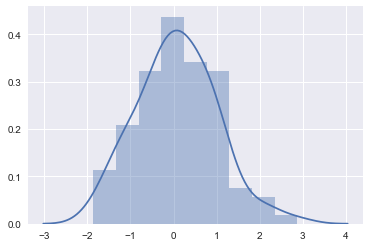

In [3]:
#help(sns.distplot)
x = np.random.normal(size=100)
sns.distplot(x,kde=True) # kde 是否进行密度估计

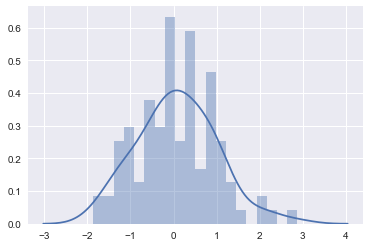

In [4]:
sns.distplot(x, bins=20, kde=True)

### 数据分布情况  ###

In [5]:
#help(sns.distplot)

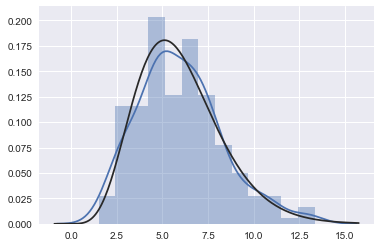

In [6]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=True, fit=stats.gamma)

根据均值和协方差生成数据

In [7]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
print(data.shape)
df = pd.DataFrame(data, columns=["x", "y"])
df

(200, 2)


,x,y
0,2.190873,2.902961
1,0.387901,3.441322
2,-1.304909,0.586173
3,-0.016867,0.907323
4,0.284953,1.189304
5,-0.050474,0.670980
6,0.722333,1.062931
7,-0.026326,1.294782
8,-0.788587,0.669541
9,-0.372764,1.731517


###  观测两个变量之间的分布关系最好用散点图 ###

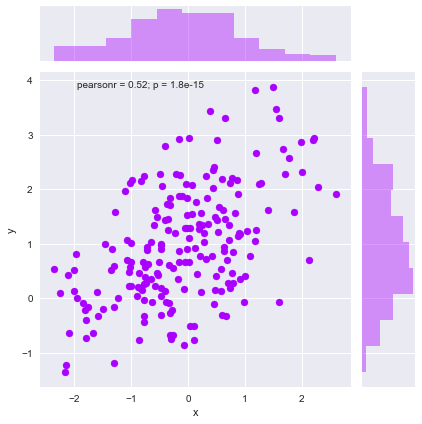

In [8]:
# help(sns.jointplot)
sns.jointplot(x="x", y="y", data=df, color=[169/255,0/255,255/255]);

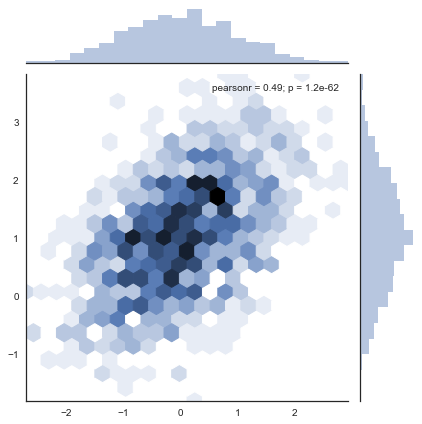

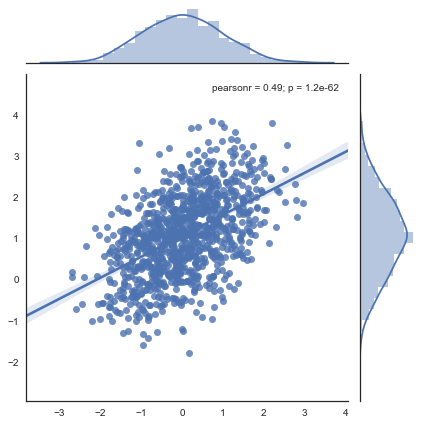

In [9]:
#help(sns.jointplot)
x, y = np.random.multivariate_normal(mean, cov, 1000).T

with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="b")
    sns.jointplot(x=x, y=y, kind="reg", color="b")

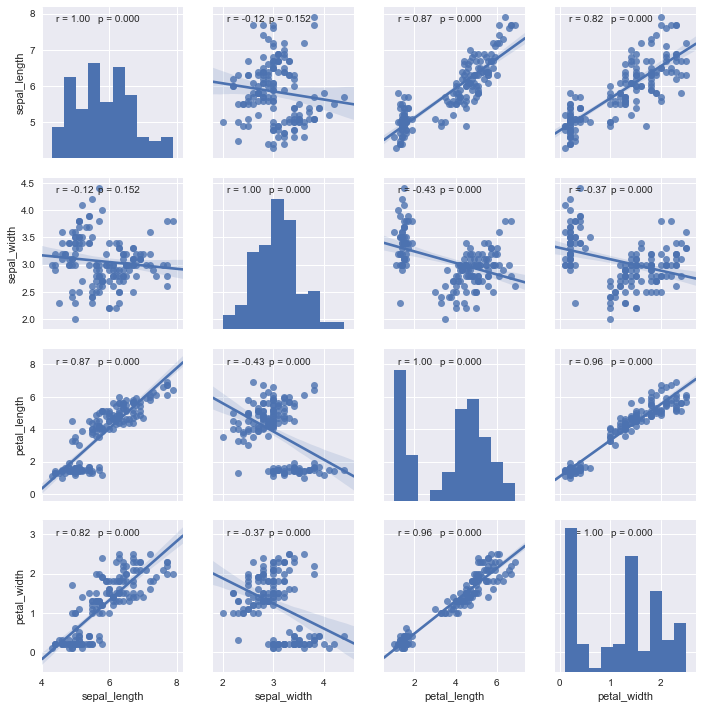

In [10]:
import scipy.stats as sps
# help(sns.pairplot)
iris = sns.load_dataset("iris")
# print(iris)
fig = sns.pairplot(iris,kind="reg")
def corrfunc(x, y, **kws):
    (r, p) = sps.pearsonr(x, y)
    ax = mplt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

fig.map(corrfunc)